#Proyecto Ciencia de datos aplicada

Santiago Segura - Felipe Palacios - Vihlai Maldonado

In [ ]:
!pip install --upgrade pandas-profiling
!pip install markupsafe==2.0.1
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
plt.style.use("seaborn-deep")
import seaborn as sns
import csv
from sklearn.model_selection import train_test_split
import category_encoders as ce
%matplotlib inline

In [ ]:
# Pandas configuration for extending the number of rows and columns to visualize, if not limit set parameter to None or -1
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

## Lectura Archivo

In [ ]:
cars_df = pd.read_csv('car_price_prediction.csv')

## Exploración de datos

In [ ]:
cars_df.shape

(19237, 18)

In [ ]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [ ]:
ProfileReport(cars_df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Limpieza y preparación de datos

In [ ]:
cars_df.shape

(19237, 18)

In [ ]:
cars_df[cars_df.duplicated(keep=False)].sort_values('ID')

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
5754,35464629,7840,1111,HONDA,FIT,2012,Hatchback,No,Petrol,1.3,108000 km,4.0,Automatic,Front,04-May,Right-hand drive,Blue,6
7269,35464629,7840,1111,HONDA,FIT,2012,Hatchback,No,Petrol,1.3,108000 km,4.0,Automatic,Front,04-May,Right-hand drive,Blue,6
1107,36559154,19726,-,MERCEDES-BENZ,Sprinter 411,2002,Goods wagon,No,Diesel,2.2 Turbo,280000 km,4.0,Manual,Rear,02-Mar,Left wheel,White,2
6732,36559154,19726,-,MERCEDES-BENZ,Sprinter 411,2002,Goods wagon,No,Diesel,2.2 Turbo,280000 km,4.0,Manual,Rear,02-Mar,Left wheel,White,2
9990,41770767,11917,-,NISSAN,Murano,2004,Jeep,Yes,CNG,3.5,233600 km,6.0,Variator,4x4,04-May,Left wheel,Silver,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15880,45815564,9408,-,MERCEDES-BENZ,E 240,2000,Sedan,No,Petrol,2.4,252000 km,6.0,Manual,Rear,04-May,Left wheel,Black,4
14469,45815994,4077,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,111930 km,4.0,Automatic,Front,04-May,Left wheel,Silver,12
3756,45815994,4077,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,111930 km,4.0,Automatic,Front,04-May,Left wheel,Silver,12
8730,45816384,49237,730,HYUNDAI,Tucson,2016,Jeep,Yes,Petrol,1.6,27000 km,4.0,Tiptronic,4x4,04-May,Left wheel,White,12


Se procede a eliminar los registros duplicados

In [ ]:
cars_df = cars_df.drop_duplicates()
cars_df.shape

(18924, 18)

In [ ]:
#Nan values
cars_df[cars_df.isnull().any(axis=1)].shape

(0, 18)

No contamos con valores nulos en el dataset.

In [ ]:
cars_df['Mileage'] = cars_df['Mileage'].str.replace(" km", "").astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#Tax
cars_df[cars_df['Levy'] == '-']

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2
9,45756839,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
11,45814819,8781,-,FORD,Transit,1999,Microbus,No,CNG,4,0,8.0,Manual,Rear,02-Mar,Left wheel,Blue,0
12,45815568,3000,-,OPEL,Vectra,1997,Goods wagon,No,CNG,1.6,350000,4.0,Manual,Front,04-May,Left wheel,White,4
23,45814106,7840,-,FORD,Transit,2001,Microbus,No,Diesel,2.0 Turbo,230000,4.0,Manual,Front,02-Mar,Left wheel,White,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19223,44571028,8781,-,DODGE,Caliber,2008,Hatchback,No,Petrol,2.4,0,4.0,Automatic,Front,04-May,Left wheel,Blue,4
19224,45768089,19130,-,KIA,Optima ex,2014,Sedan,Yes,Petrol,2.4,35800,4.0,Automatic,Front,04-May,Left wheel,Black,12
19226,45796788,7840,-,NISSAN,Skyline,2003,Sedan,Yes,Petrol,3,220000,6.0,Tiptronic,Rear,04-May,Right-hand drive,White,0
19229,39977395,50,-,TOYOTA,Prius,2008,Hatchback,No,Hybrid,1.5,150000,4.0,Automatic,Front,04-May,Left wheel,Silver,6


Observamos que la columna Levy contiene un caracter especial '-'. Vamos a tratar este valor como si no tuviera levy asignado, es decir se imputará con 0.

In [ ]:
cars_df['Levy'] = cars_df['Levy'].str.replace('-', "0").astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
cars_df['Doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

Al valor de 04-May en la columna `Doors` se le asignará el valor de 4-5 y al valor de 02-Mar el valor de 2-3. Esto se tratará adicionalmente con una asignación discreta para el proceso de regresión.

In [ ]:
cars_df['Doors'] = cars_df['Doors'].replace({
    "04-May":"4-5",
    "02-Mar":"2-3"})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
cars_df['Doors']

0        4-5
1        4-5
2        4-5
3        4-5
4        4-5
        ... 
19232    2-3
19233    4-5
19234    4-5
19235    4-5
19236    4-5
Name: Doors, Length: 18924, dtype: object

In [ ]:
cars_df['Engine volume'].str.contains('Turbo').replace({True: 1, False:0})

0        0
1        0
2        0
3        0
4        0
        ..
19232    1
19233    0
19234    0
19235    0
19236    0
Name: Engine volume, Length: 18924, dtype: int64

In [ ]:
cars_df['Turbo'] = cars_df['Engine volume'].str.contains('Turbo').replace({True: 1, False:0})
cars_df['Engine volume'] = cars_df['Engine volume'].str.replace(' Turbo', '').astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Análisis monovariable

In [ ]:
def build_freq_table(input_df, column_name):
  input_df = cars_df.groupby([column_name])['ID'].count().sort_values(ascending=False).reset_index().rename(columns={"ID": "count"}, errors="raise")
  input_df['porcentaje'] = input_df['count'].apply(lambda x: (x/input_df['count'].sum())*100).round(2).astype(str) + '%'
  input_df['acumulado'] = input_df['count'].cumsum()
  return input_df

[Text(0.5, 1.0, 'Histograma de Levy')]

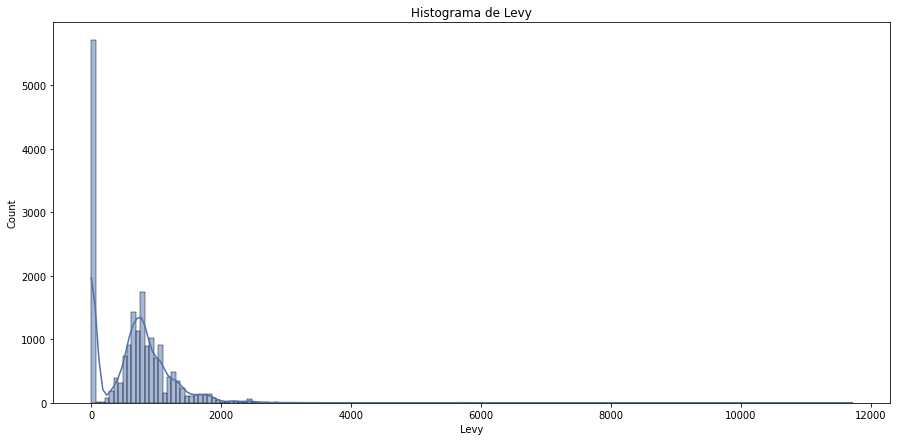

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.histplot(cars_df['Levy'], kde=True).set(title='Histograma de Levy')

In [ ]:
cars_df['Levy'].describe()

count    18924.000000
mean       632.886493
std        568.273736
min          0.000000
25%          0.000000
50%        642.000000
75%        917.000000
max      11714.000000
Name: Levy, dtype: float64

In [ ]:
build_freq_table(cars_df, 'Manufacturer')

,Manufacturer,count,porcentaje,acumulado
0,HYUNDAI,3729,19.71%,3729
1,TOYOTA,3606,19.06%,7335
2,MERCEDES-BENZ,2043,10.8%,9378
3,FORD,1088,5.75%,10466
4,CHEVROLET,1047,5.53%,11513
5,BMW,1036,5.47%,12549
6,HONDA,960,5.07%,13509
7,LEXUS,927,4.9%,14436
8,NISSAN,645,3.41%,15081
9,VOLKSWAGEN,571,3.02%,15652


In [ ]:
build_freq_table(cars_df, 'Category')

,Category,count,porcentaje,acumulado
0,Sedan,8600,45.44%,8600
1,Jeep,5378,28.42%,13978
2,Hatchback,2799,14.79%,16777
3,Minivan,633,3.34%,17410
4,Coupe,528,2.79%,17938
5,Universal,361,1.91%,18299
6,Microbus,299,1.58%,18598
7,Goods wagon,229,1.21%,18827
8,Pickup,51,0.27%,18878
9,Cabriolet,35,0.18%,18913


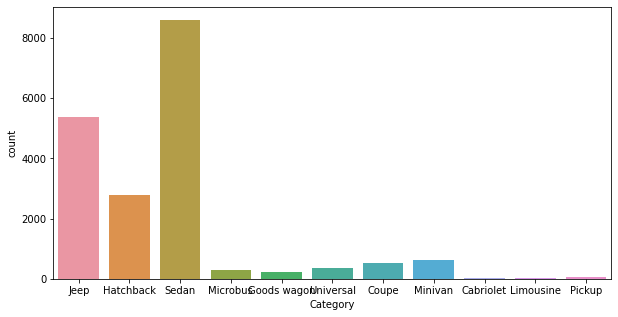

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=cars_df, x='Category')

In [ ]:
build_freq_table(cars_df, 'Leather interior')

,Leather interior,count,porcentaje,acumulado
0,Yes,13731,72.56%,13731
1,No,5193,27.44%,18924


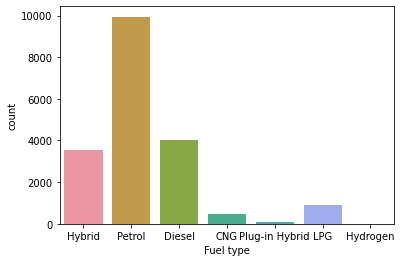

In [ ]:
sns.countplot(data=cars_df, x='Fuel type')

In [ ]:
build_freq_table(cars_df, 'Engine volume')

,Engine volume,count,porcentaje,acumulado
0,2.0,4259,22.51%,4259
1,2.5,2337,12.35%,6596
2,1.8,1918,10.14%,8514
3,1.6,1562,8.25%,10076
4,1.5,1354,7.15%,11430
5,3.5,1219,6.44%,12649
6,3.0,1086,5.74%,13735
7,2.4,1027,5.43%,14762
8,1.3,534,2.82%,15296
9,1.4,517,2.73%,15813


In [ ]:
cars_df['Mileage'].describe()

count    1.892400e+04
mean     1.555373e+06
std      4.880221e+07
min      0.000000e+00
25%      7.019575e+04
50%      1.264000e+05
75%      1.891198e+05
max      2.147484e+09
Name: Mileage, dtype: float64

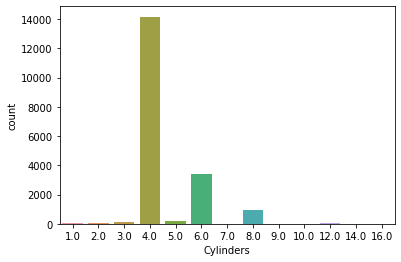

In [ ]:
sns.countplot(data = cars_df, x='Cylinders')

In [ ]:
build_freq_table(cars_df, 'Cylinders')

,Cylinders,count,porcentaje,acumulado
0,4.0,14159,74.82%,14159
1,6.0,3373,17.82%,17532
2,8.0,976,5.16%,18508
3,5.0,169,0.89%,18677
4,3.0,107,0.57%,18784
5,2.0,42,0.22%,18826
6,12.0,38,0.2%,18864
7,1.0,37,0.2%,18901
8,10.0,12,0.06%,18913
9,16.0,5,0.03%,18918


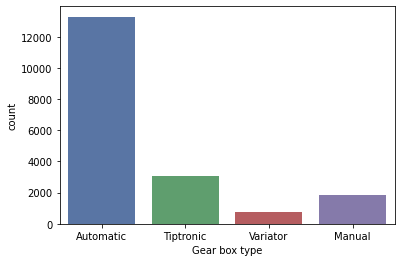

In [ ]:
sns.countplot(data=cars_df, x='Gear box type')

In [ ]:
build_freq_table(cars_df, 'Gear box type')

,Gear box type,count,porcentaje,acumulado
0,Automatic,13282,70.19%,13282
1,Tiptronic,3065,16.2%,16347
2,Manual,1844,9.74%,18191
3,Variator,733,3.87%,18924


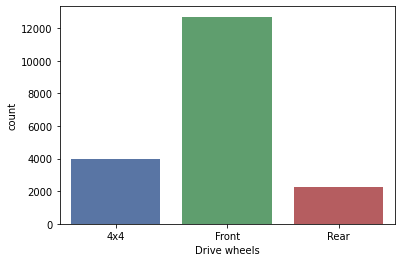

In [ ]:
sns.countplot(data=cars_df, x='Drive wheels')

In [ ]:
build_freq_table(cars_df, 'Drive wheels')

,Drive wheels,count,porcentaje,acumulado
0,Front,12695,67.08%,12695
1,4x4,3969,20.97%,16664
2,Rear,2260,11.94%,18924


In [ ]:
cars_df['Doors'].unique()

array(['4-5', '2-3', '>5'], dtype=object)

In [ ]:
build_freq_table(cars_df, 'Doors')

,Doors,count,porcentaje,acumulado
0,4-5,18032,95.29%,18032
1,2-3,768,4.06%,18800
2,>5,124,0.66%,18924


In [ ]:
build_freq_table(cars_df, 'Wheel')

,Wheel,count,porcentaje,acumulado
0,Left wheel,17471,92.32%,17471
1,Right-hand drive,1453,7.68%,18924


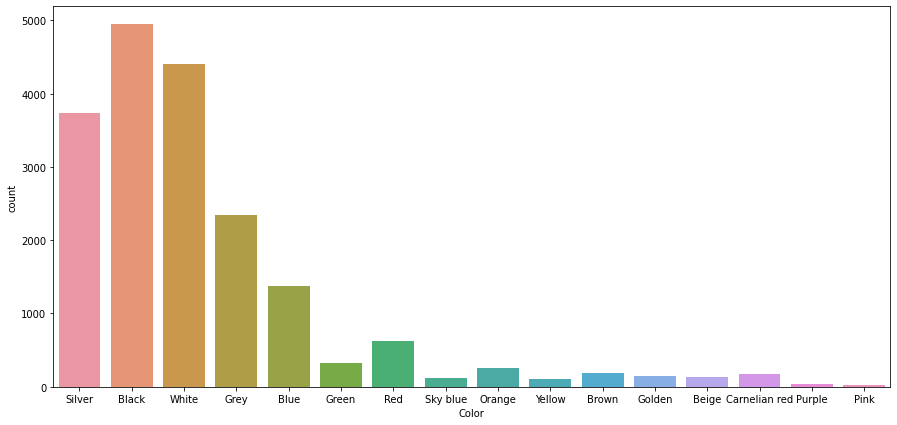

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot(data=cars_df, x = 'Color')

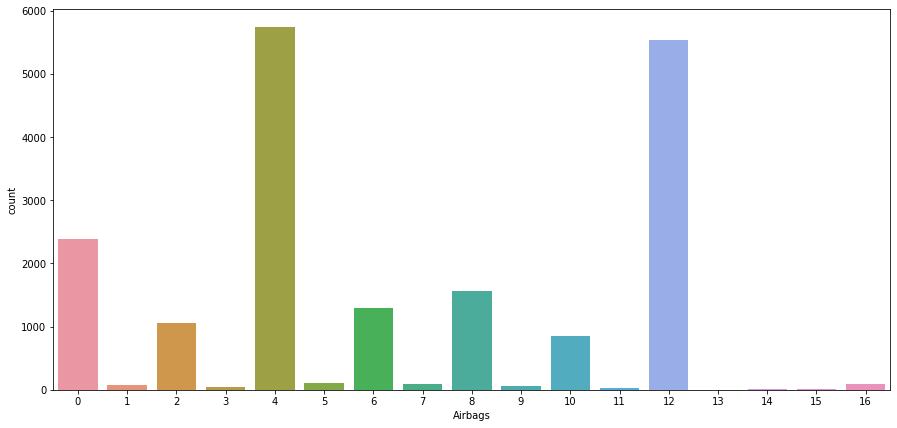

In [ ]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot(data=cars_df, x = 'Airbags')

In [ ]:
build_freq_table(cars_df, 'Airbags')

,Airbags,count,porcentaje,acumulado
0,4,5733,30.29%,5733
1,12,5534,29.24%,11267
2,0,2384,12.6%,13651
3,8,1569,8.29%,15220
4,6,1289,6.81%,16509
5,2,1051,5.55%,17560
6,10,845,4.47%,18405
7,5,104,0.55%,18509
8,16,93,0.49%,18602
9,7,85,0.45%,18687


In [ ]:
cars_df['Airbags'].unique()

array([12,  8,  2,  0,  4,  6, 10,  3,  1, 16,  5,  7,  9, 11, 14, 15, 13])

In [ ]:
build_freq_table(cars_df, 'Turbo')

,Turbo,count,porcentaje,acumulado
0,0,17032,90.0%,17032
1,1,1892,10.0%,18924


In [ ]:
build_freq_table(cars_df, 'Manufacturer')

,Manufacturer,count,porcentaje,acumulado
0,HYUNDAI,3729,19.71%,3729
1,TOYOTA,3606,19.06%,7335
2,MERCEDES-BENZ,2043,10.8%,9378
3,FORD,1088,5.75%,10466
4,CHEVROLET,1047,5.53%,11513
5,BMW,1036,5.47%,12549
6,HONDA,960,5.07%,13509
7,LEXUS,927,4.9%,14436
8,NISSAN,645,3.41%,15081
9,VOLKSWAGEN,571,3.02%,15652


A continuación, se realizará la codificación de variables.

In [ ]:
processed_df = cars_df.copy()

La variable `Doors` es categórica ordinal, ya que al número de puertas se le puede asignar un orden. Por tal motivo se codificará asignandole un número entero.

In [ ]:
processed_df['Doors'].unique()

array(['4-5', '2-3', '>5'], dtype=object)

In [ ]:
processed_df['Doors'] = processed_df['Doors'].replace({'2-3': 1, '4-5': 2, '>5': 3})

Dado que la columna `Wheel` es categórica nominal, se aplicará One-hot encoding.

In [ ]:
wheel_dummies = pd.get_dummies(processed_df['Wheel'], drop_first = True, prefix='Wheel_')
processed_df = pd.concat([processed_df, wheel_dummies], axis = 1).drop('Wheel', axis=1)

Dado que la columna `Drive wheels` es categórica nominal, se aplicará One-hot encoding.

In [ ]:
drive_wheels = pd.get_dummies(processed_df['Drive wheels'], prefix='Drive wheels')
processed_df = pd.concat([processed_df, drive_wheels], axis = 1).drop('Drive wheels', axis=1)

Dado que la columna `Gear box` es categórica nominal, se aplicará One-hot encoding.

In [ ]:
gear_box_type = pd.get_dummies(processed_df['Gear box type'],  prefix='Gear_box_type')
processed_df = pd.concat([processed_df, gear_box_type], axis = 1).drop('Gear box type', axis=1)

Dado que la columna `Fuel type` es categórica nominal, se aplicará One-hot encoding.

In [ ]:
fuel_type = pd.get_dummies(processed_df['Fuel type'], prefix='fuel_type_')
processed_df = pd.concat([processed_df, fuel_type], axis = 1).drop('Fuel type', axis=1)

Dado que la columna `Leather interior` es categórica nominal, se aplicará One-hot encoding.

In [ ]:
processed_df['Leather interior'] = processed_df['Leather interior'].replace({'Yes': 1, 'No': 0})

Dado que la columna `Category`es categórica nominal, se aplicará One-hot encoding.

In [ ]:
category = pd.get_dummies(processed_df['Category'], drop_first = True, prefix='category_')
processed_df = pd.concat([processed_df, category], axis = 1).drop('Category', axis=1)

In [ ]:
processed_df = processed_df.drop('ID', axis=1)

### Distribución de vehículos por años

[Text(0.5, 1.0, 'Cantidad de vehículos por año de producción')]

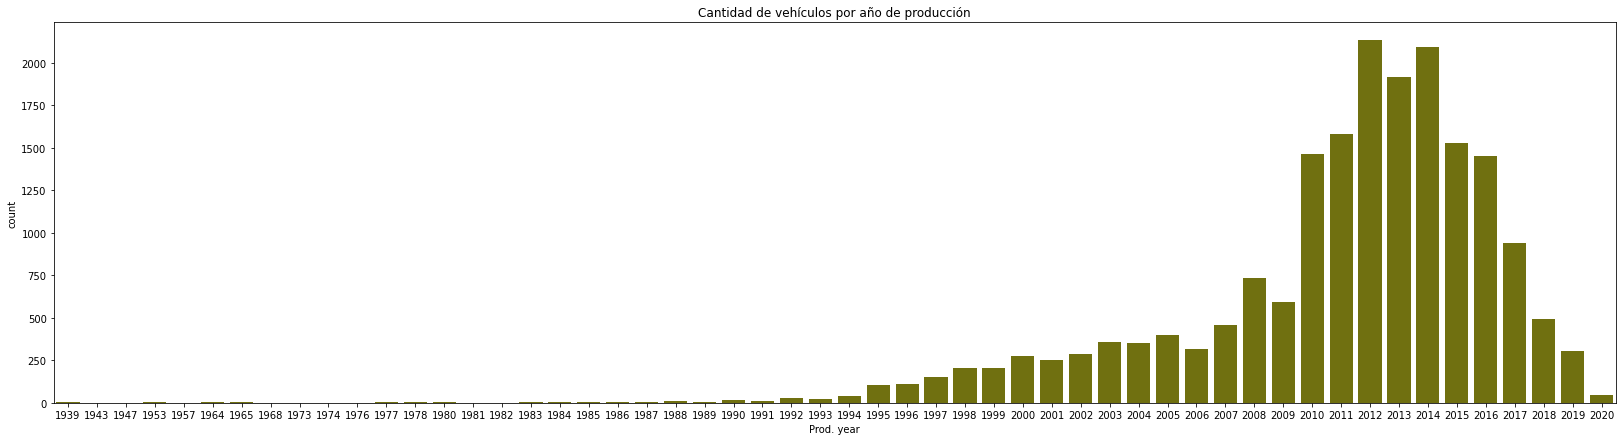

In [ ]:
fig, ax = plt.subplots(figsize=(28, 7))
sns.countplot(data=cars_df, x='Prod. year', color="olive").set(title = 'Cantidad de vehículos por año de producción')

## Hipótesis/Preguntas:
* ¿Cuáles son las marcas más vendidas?
* ¿Cuáles son las marcas que se venden a un mayor precio?
* ¿Los carros más nuevos se suelen vender a un valor más alto?
* ¿Entre menos kilómetros recorridos tenga el vehículo se vende a un valor alto?
* ¿Cuáles son las características que más influyen en el precio al cual es vendido el vehículo?

### Distribución de las primeras 10 marcas por cantidad de vehículos

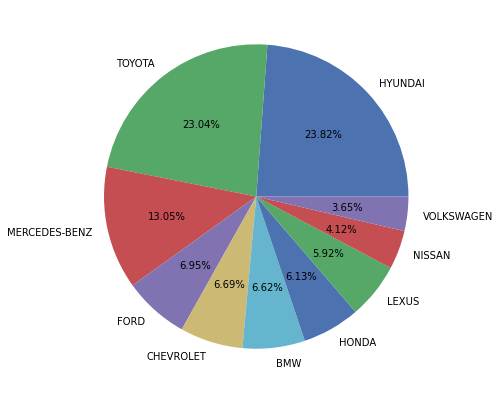

In [ ]:
maxManufacturer = cars_df.Manufacturer.value_counts()[:10].to_list()
# maxManufacturer
maxManufacturernames = cars_df.Manufacturer.value_counts().index[:10].to_list()
fig, ax = plt.subplots(figsize=(28, 7))
plt.pie(maxManufacturer, labels=maxManufacturernames, autopct="%0.2f%%")
plt.show()

### Modelos de carros más costosos y baratos

In [ ]:
less_value_cars= cars_df.groupby(['Manufacturer', 'Model', 'Prod. year'])['Price'].mean().head(15).sort_values()
less_value_cars

Manufacturer  Model      Prod. year
ACURA         TL saber   2001             69.0
              RDX        2015            282.0
AUDI          100        2014            549.0
ACURA         TL         2010            745.0
              TSX        2010           1291.0
ALFA ROMEO    147        2001           3700.0
ACURA         TSX        2012           4077.0
ALFA ROMEO    166        2001           4500.0
ACURA         MDX        2011           4861.0
              TLX        2015           6899.5
              MDX        2012           8310.5
ALFA ROMEO    159        2005          12544.0
              Giulietta  2013          18817.0
ACURA         RDX        2014          21796.0
ASTON MARTIN  Virage     2007          54000.0
Name: Price, dtype: float64

In [ ]:
more_value_cars = cars_df.groupby(['Manufacturer', 'Model'])['Price'].mean().sort_values(ascending=False).head(15)
more_value_cars

Manufacturer   Model                  
LAMBORGHINI    Urus                       872946.000000
OPEL           Combo                      740856.611111
MERCEDES-BENZ  G 65 AMG 63AMG             627220.000000
               AMG GT S                   297930.000000
LAND ROVER     Range Rover Vogue          297930.000000
BMW            M5 Машина в максимально    288521.000000
MERCEDES-BENZ  GLE 400 A M G              254024.000000
BENTLEY        Continental GT             219527.000000
MERCEDES-BENZ  G 65 AMG G63 AMG           216391.000000
               GLE 400                    193287.000000
               GLE 400 Coupe, AMG Kit     193184.000000
BENTLEY        Mulsanne                   175622.000000
BMW            M6 Gran cupe               163077.000000
JAGUAR         F-type R                   150533.000000
LAND ROVER     Range Rover Velar          150533.000000
Name: Price, dtype: float64

### ¿Los carros nuevos se suelen vender a un valor más alto?
Para responder inicialmente a esta pregunta, revisaremos los precios de los carros de los últimos 10 años y los comparamos con los precios de los últimos 20 años.

In [ ]:
last_10_years_cars_df = cars_df[cars_df['Prod. year']>=2010][['Price','Prod. year']].groupby('Prod. year').mean()
last_10_years_cars_df

,Price
Prod. year,
2010,14289.215995
2011,14039.120101
2012,15352.572970
2013,16714.076320
2014,17914.195694
2015,20918.979699
2016,28336.581781
2017,26999.066950
2018,35386.830957


In [ ]:
last_20_years_cars_df = cars_df[(cars_df['Prod. year']>=2000) & (cars_df['Prod. year']<=2010)][['Price','Prod. year']].groupby('Prod. year').mean()
last_20_years_cars_df

,Price
Prod. year,
2000,8095.519856
2001,8526.952569
2002,9243.901754
2003,9773.946927
2004,11249.971751
2005,10904.174242
2006,12926.117460
2007,13058.215217
2008,11472.160055


Del anterior resultado observamos que en promedio para fechas de fabricación del automóvil más recientes, en los últimos 10 años (desde 2010), los precios son más altos que los de hace más de 10 años.

### ¿Entre menos kilometraje, el vehículo se vende a un valor alto?

In [ ]:
cars_df['Mileage'].describe()

count    1.892400e+04
mean     1.555373e+06
std      4.880221e+07
min      0.000000e+00
25%      7.019575e+04
50%      1.264000e+05
75%      1.891198e+05
max      2.147484e+09
Name: Mileage, dtype: float64

Analizaremos los precios de acuerdo al Q1, Q2 y Q3 de la variable Mileage.

In [ ]:
q1_mileage, q2_mileage, q3_mileage = cars_df['Mileage'].quantile([0.25,0.5,0.75])

In [ ]:
cars_df[cars_df['Mileage']<=q1_mileage]['Price'].mean()

22645.021982667513

In [ ]:
cars_df[cars_df['Mileage']<=q2_mileage]['Price'].mean()

23894.73048896399

In [ ]:
cars_df[cars_df['Mileage']<=q3_mileage]['Price'].mean()

21055.738885366027

De acuerdo al resultado anterior observamos que para automoviles con un kilometraje bajo su precio es en promedio más alto que para automoviles en un kilometraje alto.

Eliminamos las columnas que no tienen valores numéricos dada su alta cardinalidad.

In [ ]:
X_train = processed_df.copy()

In [ ]:
X_train = X_train.drop(['Model', 'Color'], axis=1)

In [ ]:
X_binary = ce.BinaryEncoder().fit_transform(X_train['Manufacturer'])
#X_train.drop(['Manufacturer',	'Model', 'Color'], axis=1)
X_train = pd.concat([X_train, X_binary], axis=1).drop('Manufacturer', axis=1)

### Correlaciones

In [ ]:
X_train.corr()

,Price,Levy,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Doors,Airbags,Turbo,Wheel__Right-hand drive,Drive wheels_4x4,Drive wheels_Front,Drive wheels_Rear,Gear_box_type_Automatic,Gear_box_type_Manual,Gear_box_type_Tiptronic,Gear_box_type_Variator,fuel_type__CNG,fuel_type__Diesel,fuel_type__Hybrid,fuel_type__Hydrogen,fuel_type__LPG,fuel_type__Petrol,fuel_type__Plug-in Hybrid,category__Coupe,category__Goods wagon,category__Hatchback,category__Jeep,category__Limousine,category__Microbus,category__Minivan,category__Pickup,category__Sedan,category__Universal,Manufacturer_0,Manufacturer_1,Manufacturer_2,Manufacturer_3,Manufacturer_4,Manufacturer_5,Manufacturer_6
Price,1.000000,-0.003558,0.012689,0.000551,0.008888,-0.001763,0.007435,-0.031198,-0.012709,0.016973,-0.014558,0.002662,-0.000627,-0.002433,-0.020625,0.012447,0.017678,-0.003988,-0.008630,0.032602,-0.019326,0.000068,-0.006072,-0.006552,0.001770,0.002376,0.061207,-0.015684,0.016965,-0.000885,-0.000032,0.001950,0.002915,-0.020829,0.004909,0.000719,0.002695,-0.003822,0.010242,-0.007461,-0.018127,0.000059
Levy,-0.003558,1.000000,0.362827,0.331553,0.378117,-0.021203,0.251632,0.081417,0.125015,-0.168714,-0.144092,0.157276,-0.078611,-0.083536,0.346028,-0.247557,-0.171412,-0.112566,-0.156013,0.104249,-0.053378,-0.008096,-0.017915,0.019264,-0.049014,-0.024310,-0.053689,-0.174517,0.195741,-0.026859,-0.070098,-0.008256,-0.002228,-0.014324,0.010360,-0.011450,-0.022689,-0.048320,-0.168680,0.007850,-0.102953,0.111310
Prod. year,0.012689,0.362827,1.000000,0.388608,-0.032427,-0.064058,-0.099443,0.176678,0.235160,-0.077724,-0.228141,-0.060518,0.255684,-0.294522,0.375617,-0.516918,-0.033649,-0.031764,-0.310458,0.005600,0.107079,0.001393,0.042624,-0.013003,0.025566,-0.061885,-0.142319,-0.041457,0.083157,-0.131979,-0.167342,-0.060260,-0.006769,0.087751,-0.029458,-0.000752,-0.065876,-0.070639,-0.272796,0.119594,-0.090857,0.026564
Leather interior,0.000551,0.331553,0.388608,1.000000,0.271749,-0.034682,0.199716,0.094042,0.161889,-0.104543,-0.346620,0.088471,-0.047208,-0.042663,0.368329,-0.388138,-0.044977,-0.190779,-0.130487,0.114830,-0.034578,0.004471,0.069469,-0.054364,-0.010050,0.020055,-0.166971,-0.244821,0.196607,0.000091,-0.163295,-0.056836,-0.031991,0.100357,-0.033708,-0.005198,-0.020311,-0.055997,-0.094236,0.040467,-0.135754,0.143313
Engine volume,0.008888,0.378117,-0.032427,0.271749,1.000000,-0.006292,0.777228,-0.014146,0.221991,-0.017630,-0.185995,0.480145,-0.563836,0.214237,0.016582,-0.113874,0.142235,-0.135866,0.031516,0.048133,-0.123022,0.000777,-0.017520,0.060937,-0.049645,0.055831,-0.052777,-0.339724,0.285195,0.035804,0.010976,0.020744,0.028899,-0.033687,-0.028505,0.006956,0.059167,-0.077625,0.042641,-0.074106,0.038671,0.101661
Mileage,-0.001763,-0.021203,-0.064058,-0.034682,-0.006292,1.000000,-0.001720,-0.006344,-0.009174,-0.001490,0.016441,0.002141,-0.014099,0.017743,-0.032405,0.046695,0.005643,-0.005718,0.071759,-0.008899,-0.010615,-0.000214,-0.005824,-0.004046,-0.001972,-0.004869,-0.002702,-0.002478,-0.005558,-0.000704,0.015296,-0.005328,-0.001503,0.008021,-0.002266,-0.000312,0.011750,0.005157,0.019171,-0.005282,0.001987,-0.013529
Cylinders,0.007435,0.251632,-0.099443,0.199716,0.777228,-0.001720,1.000000,-0.029433,0.174112,0.035407,-0.091955,0.473807,-0.572284,0.234437,-0.051342,-0.083128,0.178980,-0.092251,0.044713,-0.016006,-0.122671,0.008600,-0.041392,0.115976,-0.027205,0.061127,-0.039411,-0.189012,0.238932,0.035836,-0.032654,-0.049041,0.007141,-0.058083,-0.053255,-0.000687,0.059288,-0.103959,0.142794,-0.174281,0.111186,0.092951
Doors,-0.031198,0.081417,0.176678,0.094042,-0.014146,-0.006344,-0.029433,1.000000,0.045274,-0.073622,-0.011619,0.036361,0.101229,-0.192335,0.156772,-0.237872,-0.021202,0.034413,0.003108,-0.011976,0.077383,0.001154,0.035153,-0.067907,0.010661,-0.516305,-0.086117,0.019612,0.074320,0.003827,-0.108348,0.035007,-0.010764,0.131488,0.014926,-0.022342,-0.077198,-0.050029,-0.068893,0.034447,-0.014082,-0.005964
Airbags,-0.012709,0.125015,0.235160,

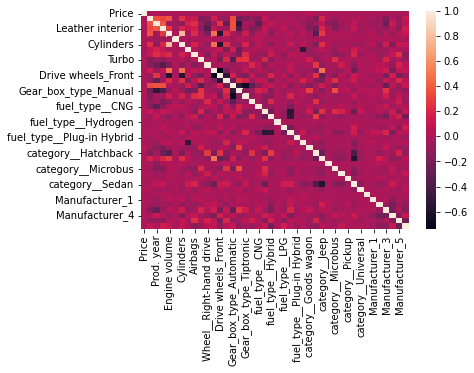

In [ ]:
sns.heatmap(X_train.corr())

In [ ]:
X_train.corr()['Price'][1:]

Levy                        -0.003558
Prod. year                   0.012689
Leather interior             0.000551
Engine volume                0.008888
Mileage                     -0.001763
Cylinders                    0.007435
Doors                       -0.031198
Airbags                     -0.012709
Turbo                        0.016973
Wheel__Right-hand drive     -0.014558
Drive wheels_4x4             0.002662
Drive wheels_Front          -0.000627
Drive wheels_Rear           -0.002433
Gear_box_type_Automatic     -0.020625
Gear_box_type_Manual         0.012447
Gear_box_type_Tiptronic      0.017678
Gear_box_type_Variator      -0.003988
fuel_type__CNG              -0.008630
fuel_type__Diesel            0.032602
fuel_type__Hybrid           -0.019326
fuel_type__Hydrogen          0.000068
fuel_type__LPG              -0.006072
fuel_type__Petrol           -0.006552
fuel_type__Plug-in Hybrid    0.001770
category__Coupe              0.002376
category__Goods wagon        0.061207
category__Ha

### ¿Cuáles son las características que más influyen en el precio al cual es vendido el vehículo?

De acuerdo al resultado anterior encontramos que la variable que más influye en el precio del automovil es `category__Goods wagon`, una variable dummy añadida proveniente de la columna `category`,  en un factor de 0.06. Esto muestra una relación lineal bastante débil. Asimismo, la marca del vehículo, denotada por las variables `Manufacturer_` no presenta alta correlación a nivel individual con el precio del vehículo.